# Paper general plots and analysis


Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is part of the EStreams publication and was used to provide generate general plots and analsysis. 

Note that this code enables not only the replicability of the current database but also the extrapolation to new catchment areas. 
* Additionally, the user should download and insert the original raw-data in the folder of the same name prior to run this code. 
* The original third-party data used were not made avaialble in this repository due to redistribution and storage-space reasons.  

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* Geopandas=0.10.2
* Pandas
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* estreams_boundaries.shp
* lamah_boundaries.shp
* mghydro_boundaries_AT00009
* riv_pfaf_2_MERIT_Hydro_v07_Basins_v01.shp. Available at: https://www.reachhydro.org/home/params/merit-basins (Last access: 23 November 2023)
* estreams_network.xlsx
* estreams_timeseries_p.csv
* Files: CAMELS_GB_hydromet_timeseries_{station}_19701001-20150930.csv. Available at: https://doi.org/10.5285/8344e4f3-d2ea-44f5-8afa-86d2987543a9 (Last access 08 December 2023)
* Files: CAMELS_CH_obs_based_{station}.csv. Available at: https://doi.org/10.5281/zenodo.10010004 (Last access 08 December 2023)

**Directory:**

* Clone the GitHub directory locally
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 

## References
* 

## License
* 

# Import modules

In [1]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl

from utils.general import *

# Configurations

In [2]:
# Only editable variable:
# Relative path to your local directory
PATH = ".."

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/"
os.chdir(PATH)

# Basin delineation validation
## Import data
### Catchment boundaries

In [4]:
catchment_boundaries = gpd.read_file('data/shapefiles/estreams_catchments.shp')
catchment_boundaries

,id,area_km2,outlet_lat,outlet_lng,name,area_offic,layer,path,Code,basin_id,area_calc,label_area,geometry
0,EEGR055,95,58.229,25.884,6172205,83.3,EEGR055,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,EEGR055,EEGR055,95.240,None,"POLYGON Z ((25.86458 58.23208 0.00000, 25.8645..."
1,EEGR056,576,58.446,24.498,6172059,550,EEGR056,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,EEGR056,EEGR056,575.696,None,"POLYGON Z ((24.56458 58.43958 0.00000, 24.5645..."
2,EEGR057,670,57.885,27.726,6172271,743.8,EEGR057,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,EEGR057,EEGR057,669.811,None,"POLYGON Z ((27.33458 57.83208 0.00000, 27.3362..."
3,EEGR058,280,59.423,27.530,6172017,215.2,EEGR058,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,EEGR058,EEGR058,279.928,None,"POLYGON Z ((27.51124 59.41708 0.00000, 27.5112..."
4,EEGR059,573,58.267,24.647,6172097,543.8,EEGR059,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,EEGR059,EEGR059,572.760,None,"POLYGON Z ((24.68208 58.25041 0.00000, 24.6820..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17125,HR000314,135,44.202,16.069,7267,None,HR000314,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,HR000314,HR000314,135.462,None,"POLYGON Z ((16.01458 44.21375 0.00000, 16.0137..."
17126,HR000315,458,44.162,15.858,7236,None,HR000315,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,HR000315,HR000315,457.864,None,"POLYGON Z ((15.89625 44.07791 0.00000, 15.8937..."
17127,HR000316,514,44.162,15.849,7237,None,HR000316,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,HR000316,HR000316,514.369,None,"POLYGON Z ((15.84208 44.15458 0.00000, 15.8420..."
17128,HR000317,185,45.334,14.452,6077,None,HR000317,C:/Users/nascimth/Documents/Thiago/Eawag/Pytho...,HR000317,HR000317,184.733,None,"POLYGON Z ((14.51875 45.36708 0.00000, 14.5187..."


### Network information

In [5]:
network_EU = pd.read_csv('results/estreams_gauging_stations.csv', encoding='utf-8')
network_EU.set_index("basin_id", inplace = True)
network_EU

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,area_calc,area_flag,area_perc,start_date,end_date,num_years,num_months,num_days,num_days_gaps,num_continuous_days
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,4668.379,0,-0.440608,1996-01-01,2021-12-31,26,312,9497,0.0,9497
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,102.287,0,-0.281373,1958-10-01,2021-12-31,64,759,23103,0.0,23103
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,536.299,0,-0.205344,1985-01-02,2021-12-31,37,444,13513,0.0,13513
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,66.286,0,0.471471,1998-01-02,2021-12-31,24,288,8765,0.0,8765
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,72.448,0,-0.343490,1990-01-01,2019-12-31,30,360,10957,0.0,10957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,325.370,0,-1.361371,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,47.594,0,4.237425,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,244.731,1,6.233333,1978-01-01,1987-12-31,10,120,3652,0.0,3652


In [6]:
## Replace 'inf' with 'NaN'
#network_EU.lat.replace([np.inf, -np.inf], np.nan, inplace=True)
#network_EU.lon.replace([np.inf, -np.inf], np.nan, inplace=True)

### Streamflow time-series

In [7]:
timeseries_EU = pd.read_csv("results/estreams_timeseries_streamflow.csv", index_col=0)
timeseries_EU.index = pd.to_datetime(timeseries_EU.index)
timeseries_EU.index.name = "dates"

## Number of stations per year:
* Here we can check the number of stations per year:

In [8]:
# First we resample the data to yearly:
timeseries_EU_y = timeseries_EU.resample('Y').count() # First we count the number of days with non NaN values

timeseries_EU_y

,AT000001,AT000002,AT000003,AT000004,AT000005,AT000006,AT000007,AT000008,AT000009,AT000010,...,UAGR0012,UAGR0013,UAGR0014,UAGR0015,UAGR0016,UAGR0017,UAGR0018,UAGR0019,UAGR0020,UAGR0021
dates,,,,,,,,,,,,,,,,,,,,,
1900-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1903-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,365,365,365,365,365,365,365,365,365,365,...,0,0,0,0,0,0,0,0,0,0
2020-12-31,366,366,366,366,0,366,366,366,366,366,...,0,0,0,0,0,0,0,0,0,0
2021-12-31,365,365,365,365,0,365,365,365,365,365,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Different threshoulds
summary_per_year = pd.DataFrame()
summary_per_year["less_than_0percent"] = (timeseries_EU_y.T >= 365).sum()
summary_per_year["less_than_1percent"] = (timeseries_EU_y.T > 360).sum()
summary_per_year["less_than_10percent"] = (timeseries_EU_y.T > 328).sum()
summary_per_year["less_than_25percent"] = (timeseries_EU_y.T > 273).sum()
summary_per_year["less_than_50percent"] = (timeseries_EU_y.T > 182).sum()
summary_per_year["less_than_100percent"] = (timeseries_EU_y.T > 0).sum()
summary_per_year

,less_than_0percent,less_than_1percent,less_than_10percent,less_than_25percent,less_than_50percent,less_than_100percent
dates,,,,,,
1900-12-31,23,27,28,29,30,44
1901-12-31,42,42,43,45,46,52
1902-12-31,43,44,45,46,46,53
1903-12-31,45,46,48,50,50,55
1904-12-31,49,49,52,52,53,61
...,...,...,...,...,...,...
2019-12-31,8165,8398,8714,8909,9920,10783
2020-12-31,8218,8357,8624,8873,9082,9799
2021-12-31,7102,7342,7621,7840,8726,9500


# Figure 1
## Define colour schemes:

In [10]:
color_categories = [(0, 5), (5, 10), (10, 20), (20, 40), (40, 80), (80, np.inf)]

legend_title = ""

legend_labels = ["<5","5-10", "10-20", "20-40", "40-80", ">80"]


color_mapping = {
    '0-5': '#A52A2A',   # Brown
    '5-10': '#ff7f0e',  # Orange
    '10-20': '#ffbb78',   # Light Orange
    '20-40': '#aec7e8',  # Light Blue
    '40-80': '#1f77b4',  # Blue
    '80-inf': '#9467bd'    # Purple (colorblind-friendly)
}


color_categories_2 = [(0, 2), (2, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]


legend_title_2 = ""

legend_labels_2 = ["<2","10", "20", "30",  "40", ">40"]

color_mapping_2 = {
    '0-2': '#A52A2A',   # Brown
    '2-10': '#ff7f0e',  # Light Orange
    '10-20': '#ffbb78',   # Orange
    '20-30': '#aec7e8',  # Light Blue
    '30-40': '#1f77b4',  # Blue
    '40-inf': '#9467bd'    # Purple (colorblind-friendly)
}


color_categories_3 = [(1900, 1970), (1970, 1980), (1980, 1990), (1990, 2000), (2000, 2010), (2010, np.inf)]

legend_title_3 = ""

legend_labels_3 = ["<1970","1980", "1990",  "2000", "2010", ">2010"]

color_mapping_3 = {
    '1900-1970': '#9467bd',    # Purple (colorblind-friendly) 
    '1970-1980': '#1f77b4',  # Blue, 
    '1980-1990': '#aec7e8',  # Light Blue
    '1990-2000': '#ffbb78',   # Light Orange
    '2000-2010': '#ff7f0e',  # Orange
    '2010-inf': '#A52A2A',   # Brown
}

In [11]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Plot
* Option 1:

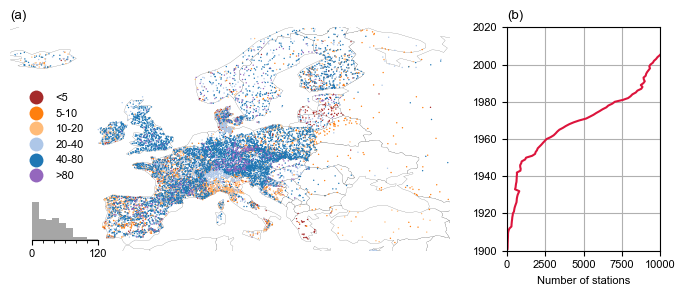

In [12]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')


## Create a function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels):
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((0.01, 0.75))  # Adjust legend position

# ... your existing subplot and plot functions ...
# Create a 2x2 subplot grid
#fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [3, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs[0], facecolor='white', edgecolor='black', linewidth=0.1)
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  


# Use the modified function to plot the same data in each subplot
plot_num_measurementsmap_subplot(plotsome = network_EU, xcoords="lon", ycoords="lat", column_labels = "num_years",
                                             color_categories=color_categories, color_mapping=color_mapping, 
                                             legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax = axs[0], 
                                             set_map_limits=True, minx=-22, miny=35, maxx=45, maxy=70, show_legend = False, legend_outside = False, 
                                             north_arrow=False, markersize_map=1)

axs[0].set_axis_off()  # Turn off both x-axis and y-axis
#axs.set_title("(a) Time lenght [years]", loc = "left",  fontweight='bold', fontsize=8, pad=-1) 


# Create a histogram inset axis within the subplot
hist_ax = axs[0].inset_axes([0.05, 0.05, 0.15, 0.175])  # Adjust the values as needed
# Extract the data for the histogram (replace 'column_name' with the actual column you want to plot)
hist_data = network_EU['num_years'].dropna()

# Plot the histogram within the inset axis
hist_ax.hist(hist_data, bins=10, color='gray', alpha=0.7)
hist_ax.set_xlabel('')  # Replace with an appropriate label
hist_ax.set_ylabel('')  # Replace with an appropriate label

# Hide the axis spines and ticks for the inset axis
hist_ax.spines['top'].set_visible(False)
hist_ax.spines['right'].set_visible(False)
hist_ax.spines['left'].set_visible(False)
hist_ax.spines['bottom'].set_visible(True)
hist_ax.set_facecolor('none')
hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=8)

# Adjust y-tick label alignment for the right y-axis
hist_ax.yaxis.tick_right()  # Move the y-tick labels to the right side
hist_ax.yaxis.set_label_position("right")  # Move the y-axis label to the right side

#hist_ax.yaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed
#hist_ax.xaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed

x_ticks = [0, 120]  # Define the specific y-axis tick values you want to show
hist_ax.set_xticks(x_ticks)
#hist_ax.set_xlabel("Years")
# Remove y-axis ticks and labels
hist_ax.set_yticks([])
hist_ax.set_yticklabels([])
hist_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=20))  # Adjust the base as needed
# Set x-axis limits (adjust the values as needed)
hist_ax.set_xlim(0, 120)

# After each subplot creation, call the function to add a circular legend
add_circular_legend(axs[0], color_mapping, legend_labels)

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)


# Define x and y for the plot
x_values = summary_per_year.less_than_100percent
y_values = summary_per_year.index

# Add the line to the plot with explicitly defined x and y
axs[1].plot(x_values, y_values, color="crimson")

start_date = pd.Timestamp('1900')
end_date = pd.Timestamp('2020')
axs[1].set_xlim(0, 10000)  # Use set_xlim to set the x-axis limits
axs[1].set_ylim(start_date, end_date)  # Use set_ylim to set the y-axis limits

axs[1].grid(True)

# Set labels and title with font size
axs[1].set_xlabel('Number of stations', fontweight='normal')
axs[1].set_ylabel('')  # Remove the y-axis label


# Save the figure
fig.tight_layout()  # Adjust the positions of the axes to prevent overlapping elements
#fig.savefig('fig2posterzhydro23.jpeg', dpi=300)

# Show the plot (if needed)
# plt.show()

axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

# Adjust layout and remove space between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.5)  # Remove space between subplots

# Save or display the plot
#plt.show()
#plt.savefig('results/figure1_spatialdist.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

* Option 2:

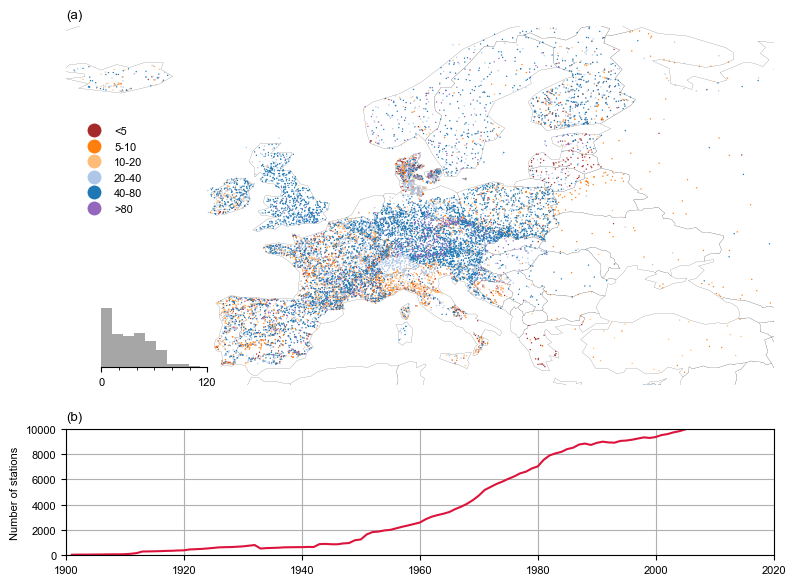

In [13]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')


## Create a function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels):
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((0.01, 0.75))  # Adjust legend position

    
# Create a 2x1 subplot grid
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs[0], facecolor='white', edgecolor='black', linewidth=0.1)
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  


# Use the modified function to plot the same data in each subplot
plot_num_measurementsmap_subplot(plotsome = network_EU, xcoords="lon", ycoords="lat", column_labels = "num_years",
                                             color_categories=color_categories, color_mapping=color_mapping, 
                                             legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax = axs[0], 
                                             set_map_limits=True, minx=-22, miny=35, maxx=45, maxy=70, show_legend = False, legend_outside = False, 
                                             north_arrow=False, markersize_map=1)

axs[0].set_axis_off()  # Turn off both x-axis and y-axis
#axs.set_title("(a) Time lenght [years]", loc = "left",  fontweight='bold', fontsize=8, pad=-1) 


# Create a histogram inset axis within the subplot
hist_ax = axs[0].inset_axes([0.05, 0.05, 0.15, 0.175])  # Adjust the values as needed
# Extract the data for the histogram (replace 'column_name' with the actual column you want to plot)
hist_data = network_EU['num_years'].dropna()

# Plot the histogram within the inset axis
hist_ax.hist(hist_data, bins=10, color='gray', alpha=0.7)
hist_ax.set_xlabel('')  # Replace with an appropriate label
hist_ax.set_ylabel('')  # Replace with an appropriate label

# Hide the axis spines and ticks for the inset axis
hist_ax.spines['top'].set_visible(False)
hist_ax.spines['right'].set_visible(False)
hist_ax.spines['left'].set_visible(False)
hist_ax.spines['bottom'].set_visible(True)
hist_ax.set_facecolor('none')
hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=8)

# Adjust y-tick label alignment for the right y-axis
hist_ax.yaxis.tick_right()  # Move the y-tick labels to the right side
hist_ax.yaxis.set_label_position("right")  # Move the y-axis label to the right side

#hist_ax.yaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed
#hist_ax.xaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed

x_ticks = [0, 120]  # Define the specific y-axis tick values you want to show
hist_ax.set_xticks(x_ticks)
#hist_ax.set_xlabel("Years")
# Remove y-axis ticks and labels
hist_ax.set_yticks([])
hist_ax.set_yticklabels([])
hist_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=20))  # Adjust the base as needed
# Set x-axis limits (adjust the values as needed)
hist_ax.set_xlim(0, 120)

# After each subplot creation, call the function to add a circular legend
add_circular_legend(axs[0], color_mapping, legend_labels)

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)


# Define x and y for the plot
y_values = summary_per_year.less_than_100percent
x_values = summary_per_year.index

# Add the line to the plot with explicitly defined x and y
axs[1].plot(x_values, y_values, color="crimson")

start_date = pd.Timestamp('1900')
end_date = pd.Timestamp('2020')
axs[1].set_ylim(0, 10000)  # Use set_xlim to set the x-axis limits
axs[1].set_xlim(start_date, end_date)  # Use set_ylim to set the y-axis limits

axs[1].grid(True)

# Set labels and title with font size
axs[1].set_ylabel('Number of stations', fontweight='normal')
axs[1].set_xlabel('')  # Remove the y-axis label

#y_ticks = [0, "", "", "", "", 10000]  # Define the specific y-axis tick values you want to show
#axs[1].set_yticklabels(y_ticks, rotation=90)


axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

# Adjust layout and remove space between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.5)  # Remove space between subplots

# Save or display the plot
#plt.show()
#plt.savefig('results/figure1_spatialdist_option2.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

* Only the catchments and the gauges:

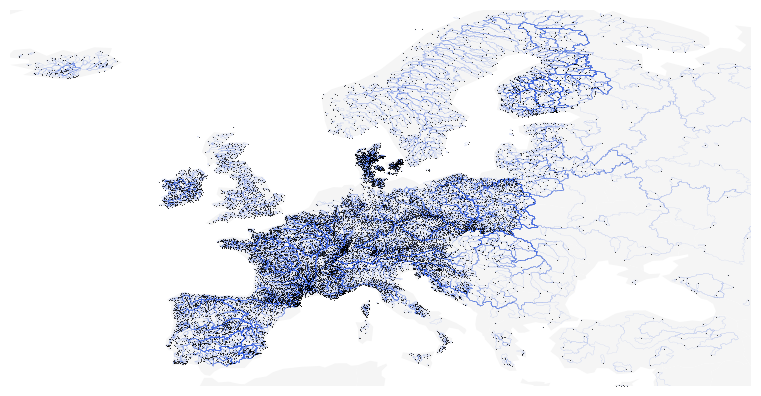

In [14]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Create a 2x1 subplot grid
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='None', linewidth=0.1)
axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

catchment_boundaries.plot(ax=axs, facecolor='None', edgecolor='royalblue', linewidth=0.05,  alpha=0.70)

axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

# Plot the gauges
axs.scatter(network_EU['lon'], network_EU['lat'], color='black', edgecolor='black',linewidth=0.5,
            marker='o', s=0.05, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_axis_off()  # Turn off both x-axis and y-axis

# Plot invisible scatter plot for legend
axs.plot([], [], color='royalblue', linewidth=0.8, label='Catchemnt boundaries')

#axs.legend(['Streamflow gauges', 'Catchment boundaries'], loc='lower left', frameon=False)


# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
#plt.show()
#plt.savefig('results/figure1_pointsandboundaries.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

* Figure 1 (combined)

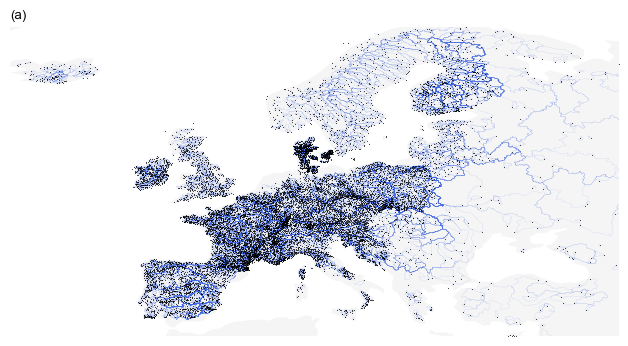

In [15]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Create a 2x1 subplot grid
fig0, axs = plt.subplots(1, 1, figsize=(7, 3.5))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='None', linewidth=0.1)
axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

catchment_boundaries.plot(ax=axs, facecolor='None', edgecolor='royalblue', linewidth=0.05,  alpha=0.70)

axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

# Plot the gauges
axs.scatter(network_EU['lon'], network_EU['lat'], color='black', edgecolor='black',linewidth=0.5,
            marker='o', s=0.05, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_axis_off()  # Turn off both x-axis and y-axis

# Plot invisible scatter plot for legend
axs.plot([], [], color='royalblue', linewidth=0.8, label='Catchemnt boundaries')
axs.set_title('(a)', loc="left")

# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
#plt.show()
plt.savefig('results/figure1a.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

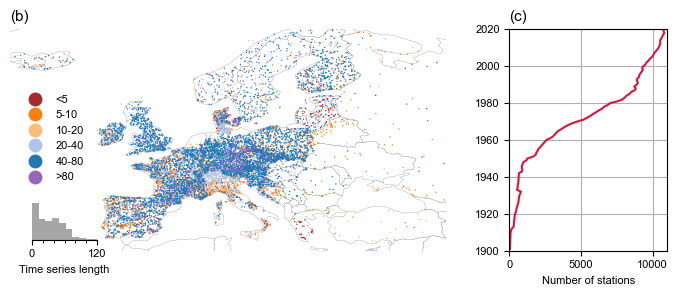

In [16]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')


## Create a function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels):
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((0.01, 0.75))  # Adjust legend position

# ... your existing subplot and plot functions ...
# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [3, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs[0], facecolor='white', edgecolor='black', linewidth=0.1)
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  


# Use the modified function to plot the same data in each subplot
plot_num_measurementsmap_subplot(plotsome = network_EU, xcoords="lon", ycoords="lat", column_labels = "num_years",
                                             color_categories=color_categories, color_mapping=color_mapping, 
                                             legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax = axs[0], 
                                             set_map_limits=True, minx=-22, miny=35, maxx=45, maxy=70, show_legend = False, legend_outside = False, 
                                             north_arrow=False, markersize_map=1)

axs[0].set_axis_off()  # Turn off both x-axis and y-axis
#axs.set_title("(a) Time lenght [years]", loc = "left",  fontweight='bold', fontsize=8, pad=-1) 


# Create a histogram inset axis within the subplot
hist_ax = axs[0].inset_axes([0.05, 0.05, 0.15, 0.175])  # Adjust the values as needed
# Extract the data for the histogram (replace 'column_name' with the actual column you want to plot)
hist_data = network_EU['num_years'].dropna()

# Plot the histogram within the inset axis
hist_ax.hist(hist_data, bins=10, color='gray', alpha=0.7)
hist_ax.set_xlabel('')  # Replace with an appropriate label
hist_ax.set_ylabel('')  # Replace with an appropriate label

# Hide the axis spines and ticks for the inset axis
hist_ax.spines['top'].set_visible(False)
hist_ax.spines['right'].set_visible(False)
hist_ax.spines['left'].set_visible(False)
hist_ax.spines['bottom'].set_visible(True)
hist_ax.set_facecolor('none')
hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=8)

# Adjust y-tick label alignment for the right y-axis
#hist_ax.yaxis.tick_right()  # Move the y-tick labels to the right side
#hist_ax.yaxis.set_label_position("right")  # Move the y-axis label to the right side

#hist_ax.yaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed
#hist_ax.xaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed

x_ticks = [0, 120]  # Define the specific y-axis tick values you want to show
hist_ax.set_xticks(x_ticks)
hist_ax.set_xlabel("Time series length",  fontweight='normal')

# Remove y-axis ticks and labels
hist_ax.set_yticks([])
hist_ax.set_yticklabels([])
hist_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=20))  # Adjust the base as needed
# Set x-axis limits (adjust the values as needed)
hist_ax.set_xlim(0, 120)

# After each subplot creation, call the function to add a circular legend
add_circular_legend(axs[0], color_mapping, legend_labels)

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)


# Define x and y for the plot
x_values = summary_per_year.less_than_100percent
y_values = summary_per_year.index

# Add the line to the plot with explicitly defined x and y
axs[1].plot(x_values, y_values, color="crimson")

start_date = pd.Timestamp('1900')
end_date = pd.Timestamp('2020')
axs[1].set_xlim(0, 11000)  # Use set_xlim to set the x-axis limits
axs[1].set_ylim(start_date, end_date)  # Use set_ylim to set the y-axis limits

axs[1].grid(True)

# Set labels and title with font size
axs[1].set_xlabel('Number of stations', fontweight='normal')
axs[1].set_ylabel('')  # Remove the y-axis label


# Save the figure
fig.tight_layout()  # Adjust the positions of the axes to prevent overlapping elements
#fig.savefig('fig2posterzhydro23.jpeg', dpi=300)

# Show the plot (if needed)
# plt.show()

axs[0].set_title('(b)', loc="left", fontsize=11)
axs[1].set_title('(c)', loc="left", fontsize=11)

# Adjust layout and remove space between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.5)  # Remove space between subplots

# Save or display the plot
#plt.show()
plt.savefig('results/figure1bc.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

* Figure 1 (combined-together)

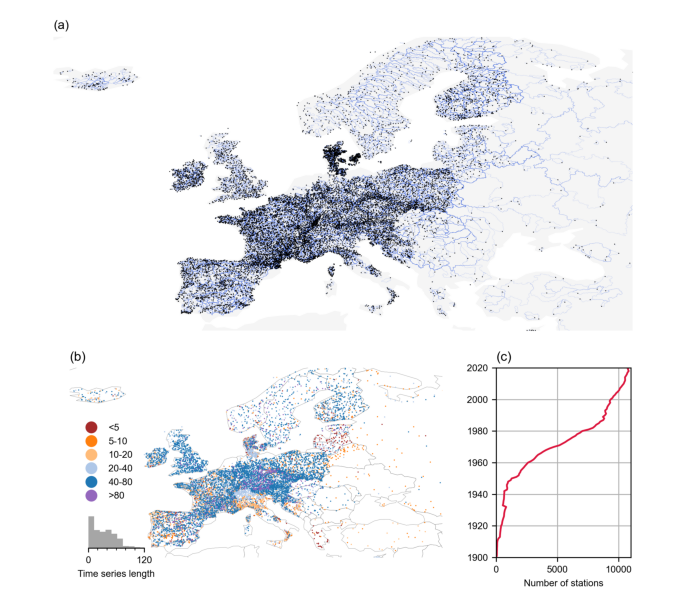

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load the saved figures
fig0 = plt.imread('results/figure1a.png')
fig1bc = plt.imread('results/figure1bc.png')

# Create a new figure with a GridSpec layout
# Reduce the figure height for a more compact layout
combined_fig = plt.figure(figsize=(7, 6))

# Create a GridSpec layout with adjusted height ratios
gs = gridspec.GridSpec(2, 1, height_ratios=[1.3, 1], hspace=0.0)  # Adjusted height ratios and space

# Plot the loaded figures onto the new figure's subplots

# For the top subplot (fig0)
ax1 = combined_fig.add_subplot(gs[0])
ax1.imshow(fig0)
ax1.axis('off')  # Hide the axes

# For the bottom subplot (fig1bc)
ax2 = combined_fig.add_subplot(gs[1])
ax2.imshow(fig1bc)
ax2.axis('off')  # Hide the axes

# Adjust layout and save the combined figure
combined_fig.tight_layout(pad=0.5)  # Adjust padding as needed to fine-tune spacing
combined_fig.savefig('results/figure1.png', dpi=500)

# Show the combined figure (if needed)
plt.show()

# Areas' labels

In [18]:
network_EU

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,area_calc,area_flag,area_perc,start_date,end_date,num_years,num_months,num_days,num_days_gaps,num_continuous_days
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,4668.379,0,-0.440608,1996-01-01,2021-12-31,26,312,9497,0.0,9497
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,102.287,0,-0.281373,1958-10-01,2021-12-31,64,759,23103,0.0,23103
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,536.299,0,-0.205344,1985-01-02,2021-12-31,37,444,13513,0.0,13513
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,66.286,0,0.471471,1998-01-02,2021-12-31,24,288,8765,0.0,8765
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,72.448,0,-0.343490,1990-01-01,2019-12-31,30,360,10957,0.0,10957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,325.370,0,-1.361371,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,47.594,0,4.237425,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,244.731,1,6.233333,1978-01-01,1987-12-31,10,120,3652,0.0,3652


In [19]:
network_EU.columns

Index(['gauge_id', 'gauge_name', 'gauge_country', 'gauge_provider', 'river',
       'lon_snap', 'lat_snap', 'lon', 'lat', 'area', 'elevation', 'area_calc',
       'area_flag', 'area_perc', 'start_date', 'end_date', 'num_years',
       'num_months', 'num_days', 'num_days_gaps', 'num_continuous_days'],
      dtype='object')

In [20]:
abs(network_EU['area_perc'])

basin_id
AT000001    0.440608
AT000002    0.281373
AT000003    0.205344
AT000004    0.471471
AT000005    0.343490
              ...   
UAGR0017    1.361371
UAGR0018    4.237425
UAGR0019    6.233333
UAGR0020    3.806184
UAGR0021    3.024055
Name: area_perc, Length: 17130, dtype: float64

In [21]:
diff_1 = (abs(network_EU['area_perc']) <= 1).sum()
diff_1

7384

In [22]:
diff_10 = (abs(network_EU['area_perc']) <= 10).sum()
diff_10

13062

In [23]:
diff_20 = (abs(network_EU['area_perc']) <= 20).sum()
diff_20

13890

In [24]:
diff_30 = (abs(network_EU['area_perc']) <= 30).sum()
diff_30

14234

In [25]:
diff_40 = (abs(network_EU['area_perc']) <= 40).sum()
diff_40

14445

In [26]:
diff_50 = (abs(network_EU['area_perc']) <= 50).sum()
diff_50

14569

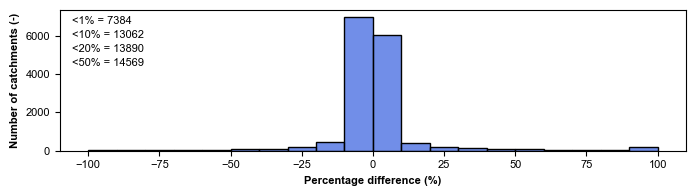

In [27]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

fig, axs = plt.subplots(1, figsize=(7, 2))

# Plotting the histogram
# Create a histogram with custom bin edges
bin_edges = [ -100, -90,-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(network_EU.area_perc, bins=bin_edges, kde=False, color='royalblue', ax=axs)
axs.set_ylabel("Number of catchments (-)")
axs.set_xlabel("Percentage difference (%)")

axs.annotate(f'<1% = {diff_1}', xy=(0.02, 0.9), xycoords='axes fraction', fontsize=8)
axs.annotate(f'<10% = {diff_10}', xy=(0.02, 0.8), xycoords='axes fraction', fontsize=8)
axs.annotate(f'<20% = {diff_20}', xy=(0.02, 0.7), xycoords='axes fraction', fontsize=8)
axs.annotate(f'<50% = {diff_50}', xy=(0.02, 0.6), xycoords='axes fraction', fontsize=8)

# Legend for the second subplot
#axs[1].legend(frameon=False)

fig.tight_layout()

#fig.savefig('results/fig_areas_comparison_total.png', dpi=300,  bbox_inches='tight')

In [28]:
network_EU["area_perc_abs"] = abs(network_EU['area_perc'])

In [29]:
network_EU_subset = network_EU[network_EU['area_perc_abs'] >= 50]
network_EU_subset

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,area_flag,area_perc,start_date,end_date,num_years,num_months,num_days,num_days_gaps,num_continuous_days,area_perc_abs
basin_id,,,,,,,,,,,,,,,,,,,,,
BA000008,Rimski M./Plandiste,Rimski M./Plandište,BA,BA_FHMZ,Bosna,18.286389,43.834167,18.286389,43.834167,23.0,...,999,-1948.969565,1987-01-01,2019-12-31,17,197,5994,6059.0,4017,1948.969565
BA000055,Vrelo Bosne,Vrelo Bosne,BA,BA_FHMZ,Bosna,18.268611,43.821389,18.268611,43.821389,15.0,...,999,-3041.753333,2007-01-01,2019-12-31,13,156,4748,0.0,4748,3041.753333
BEWA0005,29711002,Ath,BE,BE_SPW,DendreOrientale,3.777834,50.633521,3.777834,50.633521,229.0,...,999,-57.340175,1977-01-01,2021-12-31,45,540,16436,0.0,16436,57.340175
BEWA0055,92011002,CouvinRyDeRome,BE,BE_SPW,RyDeRome,4.502161,50.037506,4.502161,50.037506,16.0,...,999,-995.450000,1982-01-01,2021-12-31,40,480,14610,0.0,14610,995.450000
BEWA0056,92211002,PetignyRyDeRome,BE,BE_SPW,RyDeRome,4.551440,50.012831,4.551440,50.012831,6.0,...,999,-3339.683333,2000-01-01,2021-12-31,22,264,8036,0.0,8036,3339.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SI000116,9210,Kubed,SI,SI_ARSO,Rižana,13.879408,45.531509,13.880788,45.532914,204.5,...,999,79.799511,1965-05-01,2009-11-08,45,535,16263,0.0,16263,79.799511
TRGR0001,6665100,MERIC KOEP,TR,TR_GRDC,MARITSA RIVER,26.417917,41.192501,26.417917,41.192501,27251.0,...,999,99.990958,1975-10-01,1986-09-30,10,84,2557,1461.0,1461,99.990958
TRGR0011,6688300,DERECIKOEREN (DERECIKVIRAN),TR,TR_GRDC,YENICE IRMAGI,30.200000,40.300000,30.200000,40.300000,13300.0,...,999,99.896767,1975-10-01,1986-09-30,10,84,2557,1461.0,1461,99.896767


In [30]:
network_EU_subset_below = network_EU[network_EU['area_perc_abs'] <= 50]
network_EU_subset_below

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,area_flag,area_perc,start_date,end_date,num_years,num_months,num_days,num_days_gaps,num_continuous_days,area_perc_abs
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,0,-0.440608,1996-01-01,2021-12-31,26,312,9497,0.0,9497,0.440608
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,0,-0.281373,1958-10-01,2021-12-31,64,759,23103,0.0,23103,0.281373
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,0,-0.205344,1985-01-02,2021-12-31,37,444,13513,0.0,13513,0.205344
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,0,0.471471,1998-01-02,2021-12-31,24,288,8765,0.0,8765,0.471471
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,0,-0.343490,1990-01-01,2019-12-31,30,360,10957,0.0,10957,0.343490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,0,-1.361371,1978-01-01,1987-12-31,10,120,3652,0.0,3652,1.361371
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,0,4.237425,1978-01-01,1987-12-31,10,120,3652,0.0,3652,4.237425
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,1,6.233333,1978-01-01,1987-12-31,10,120,3652,0.0,3652,6.233333


In [31]:
color_categories = [(0, 50), (50, 100)]

legend_title = ""

legend_labels = ["<50%",">50%"]


color_mapping = {
    '0-50': 'steelblue',   # Brown
    '50-inf': 'red',  # Orange
}


## Create a function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels):
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=3) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((0.01, 0.175))  # Adjust legend position

* Plot 1:

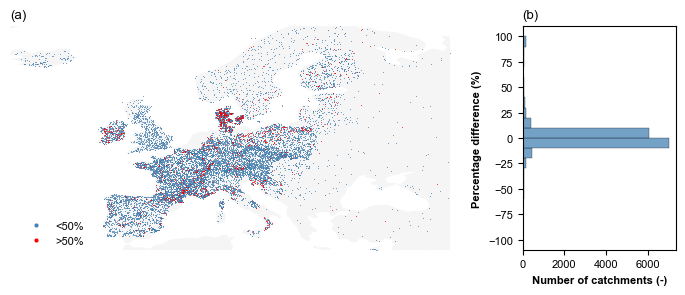

In [32]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

fig, axs = plt.subplots(1, 2,figsize=(7, 3), gridspec_kw={'width_ratios': [3, 1]})

# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs[0], facecolor='whitesmoke', edgecolor='None', linewidth=0.1)
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  

# Plot the gauges
axs[0].scatter(network_EU_subset_below['lon'], network_EU_subset_below['lat'], 
               color='black', edgecolor='steelblue',linewidth=0.5,
               marker='o', s=0.05, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs[0].scatter(network_EU_subset['lon'], network_EU_subset['lat'], 
               color='black', edgecolor='red',linewidth=0.5,
               marker='o', s=0.05, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].set_axis_off()  # Turn off both x-axis and y-axis

add_circular_legend(axs[0], color_mapping, legend_labels)


# Plotting the histogram
# Create a histogram with custom bin edges
bin_edges = [ -100, -90,-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

hist = sns.histplot(y = network_EU.area_perc, bins=bin_edges, kde=False, color='steelblue', ax=axs[1], 
                   linewidth=0.2)

axs[1].set_xlabel("Number of catchments (-)")
axs[1].set_ylabel("Percentage difference (%)")

axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

fig.tight_layout()

#fig.savefig('results/figure2.png', dpi=300,  bbox_inches='tight')

* Plot 2:
* ####  Percentage of excedence

In [33]:
# Here we subset the area_perc:
area_perc_abs = abs(network_EU.area_perc)

# Drop NaN values
area_perc_abs = area_perc_abs.dropna()

# Threshold value
threshold = 100000000000000000  # You can adjust this according to your needs

# Mask values above the threshold to be set to the threshold
area_perc_abs = area_perc_abs.where(area_perc_abs <= threshold, threshold)

# Sort the data in descending order
sorted_data = np.sort(area_perc_abs)[::-1]

# Calculate the exceedance percentage for each value
exceedance_percentage = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100

* ####  Catchments above 50% difference:

In [34]:
network_EU.area_perc_abs = abs(network_EU.area_perc)

catchments_above_50 = network_EU[["area_calc", "area_perc_abs"]]

# Here we drop the NaNs
catchments_above_50 = catchments_above_50.dropna(subset = "area_perc_abs")

catchments_above_50 = catchments_above_50[catchments_above_50.area_perc_abs >= 50]

catchments_above_50


,area_calc,area_perc_abs
basin_id,,
BA000008,471.263,1948.969565
BA000055,471.263,3041.753333
BEWA0005,360.309,57.340175
BEWA0055,175.272,995.450000
BEWA0056,206.381,3339.683333
...,...,...
SI000116,41.310,79.799511
TRGR0001,2.464,99.990958
TRGR0011,13.730,99.896767


In [35]:
1205/15774

0.07639153036642576

In [36]:
exceedance_percentage.shape

(15774,)

In [37]:
# Find the intersection point between the vertical line and the blue line
intersection_index = np.argmin(np.abs(np.array(exceedance_percentage) - 7.64))
intersection_point = (exceedance_percentage[intersection_index], sorted_data[intersection_index])
intersection_point

(7.639153036642576, 50.05773809523809)

#### Plot the data

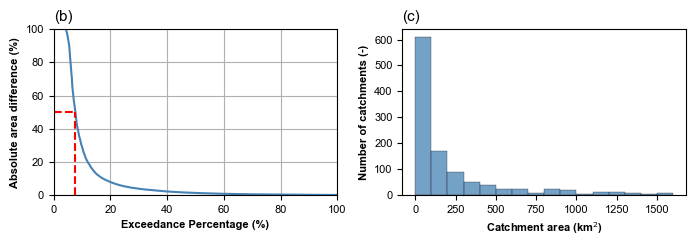

In [38]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

fig, axs = plt.subplots(1, 2,figsize=(7, 2.5))

# Excedence probability:
axs[0].plot(exceedance_percentage, sorted_data, color='steelblue',)
axs[0].set_ylim(0, 100)
axs[0].set_xlim(0, 100)
axs[0].set_ylabel('Absolute area difference (%)')
axs[0].set_xlabel('Exceedance Percentage (%)')
# Add grid lines
axs[0].grid(True)

# Add vertical line at x = 50
# Find the intersection point between the vertical line and the blue line
intersection_index = np.argmin(np.abs(np.array(exceedance_percentage) - 7.639153036642576))
intersection_point = (exceedance_percentage[intersection_index], sorted_data[intersection_index])

axs[0].axvline(x=intersection_point[0], color='red', linestyle='--', ymax=intersection_point[1]/100)
axs[0].axhline(y=intersection_point[1], color='red', linestyle='--', xmax=intersection_point[0]/100)


# Plotting the histogram
# Create a histogram with custom bin edges
bin_edges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]

hist = sns.histplot(x = catchments_above_50.area_calc, bins=bin_edges, kde=False, color='steelblue', ax=axs[1], 
                   linewidth=0.2)

axs[1].set_ylabel("Number of catchments (-)")
axs[1].set_xlabel("Catchment area (km$^2$)")

axs[0].set_title('(b)', loc="left", fontsize=11)
axs[1].set_title('(c)', loc="left", fontsize=11)

fig.tight_layout()

fig.savefig('results/figure2b.png', dpi=300,  bbox_inches='tight')

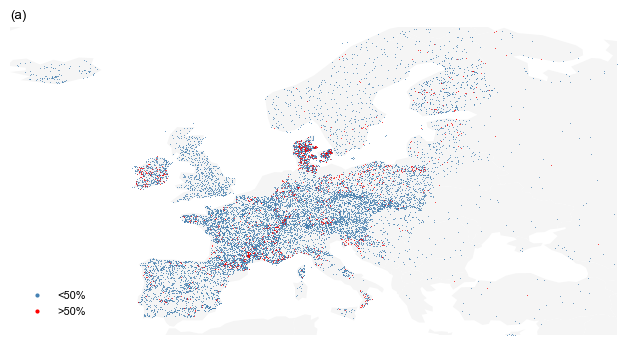

In [39]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

fig, axs = plt.subplots(1, 1, figsize=(8, 4))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='None', linewidth=0.1)
axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  
axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

# Plot the gauges
axs.scatter(network_EU_subset_below['lon'], network_EU_subset_below['lat'], 
               color='black', edgecolor='steelblue',linewidth=0.5,
               marker='o', s=0.05, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.scatter(network_EU_subset['lon'], network_EU_subset['lat'], 
               color='black', edgecolor='red',linewidth=0.5,
               marker='o', s=0.05, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_axis_off()  # Turn off both x-axis and y-axis

add_circular_legend(axs, color_mapping, legend_labels)

axs.set_title('(a)', loc="left")

fig.savefig('results/figure2a.png', dpi=300,  bbox_inches='tight')

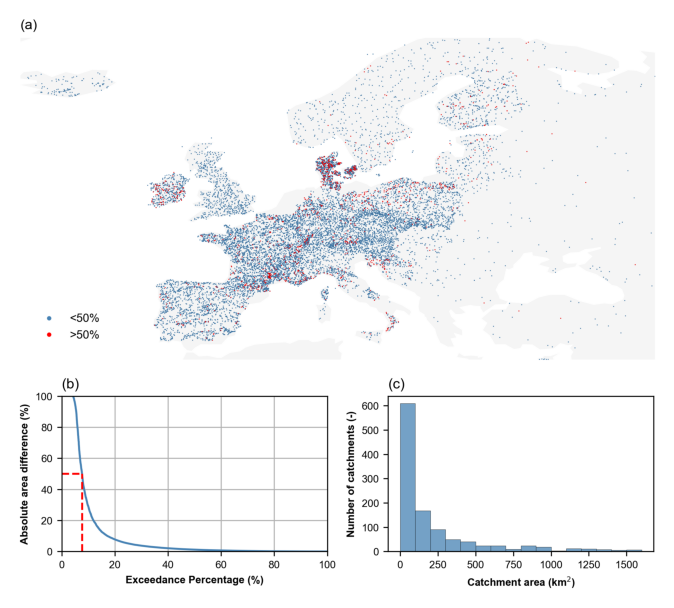

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load the saved figures
fig0 = plt.imread('results/figure2a.png')
fig1bc = plt.imread('results/figure2b.png')

# Create a new figure with a GridSpec layout
# Reduce the figure height for a more compact layout
combined_fig = plt.figure(figsize=(7, 6))

# Create a GridSpec layout with adjusted height ratios
gs = gridspec.GridSpec(2, 1, height_ratios=[1.58, 1], hspace=0.0)  # Adjusted height ratios and space

# Plot the loaded figures onto the new figure's subplots

# For the top subplot (fig0)
ax1 = combined_fig.add_subplot(gs[0])
ax1.imshow(fig0)
ax1.axis('off')  # Hide the axes

# For the bottom subplot (fig1bc)
ax2 = combined_fig.add_subplot(gs[1])
ax2.imshow(fig1bc)
ax2.axis('off')  # Hide the axes

# Adjust layout and save the combined figure
combined_fig.tight_layout(pad=0.5)  # Adjust padding as needed to fine-tune spacing
combined_fig.savefig('results/figure2.png', dpi=500)

# Show the combined figure (if needed)
plt.show()

In [41]:
# Now we can have a quick overview of our reclassification:
value_counts = network_EU['area_flag'].value_counts()
value_counts

area_flag
0      12801
999     2273
2       1037
3        369
4        343
1        164
5         68
888       64
6         11
Name: count, dtype: int64

Here we can upload our spreadsheet with the full overview of the steps made with the boundaries delineation. In the word file all the steps are fully described, and here the labels "delete", "area_error", "area_erro2" and "manual_deli" show the codes used for each step. All this pre-processing was done in QGIS.

#### At this part we need to reclassify it to the final labels we need to emply in our analysis:

0	- Fully accepted

1 - Accepted after snap

2 - Accepted after check #1	

3 - Accepted after check #2

4 - Accepted after check #3	

5 - Boundaries manually adjusted #1	

6 - Boundaries manually adjusted #2	

888	- Not accepted (karstic and canalization)

999	 - Not accepted


Full details regarding the "not accepted"  can be seen in the full overview sheet:

#### “delete”:

1 – springs

2 – Sea

3 – Canals

4 – Small streams

5 – Lake 

6 – Dam


#### “error_area”:

5 – small strems

6 – high discrepancy and num_years < 1


------------------------------------------------------------------------------------------------------------------------------
The final calculated area is called: area_calc


## Gauges quality

### Gauges network

In [43]:
network_estreams = pd.read_csv('results/estreams_gauging_stations_v03.csv', encoding='utf-8')
network_estreams.set_index("basin_id", inplace = True)
network_estreams

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,420,...,9497,0.0,0.0,9497.0,0.0,B,['CH000197'],1,16,"['AT000001', 'CH000010', 'CH000046', 'CH000048..."
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,23103,0.0,0.0,23103.0,0.0,B,['CH000221'],1,1,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,13513,0.0,0.0,13513.0,0.0,B,['CH000215'],1,2,"['AT000002', 'AT000003', 'CH000221']"
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,1014,...,8765,0.0,0.0,8765.0,0.0,B,['CH000227'],1,1,['AT000004']
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,10957,0.0,0.0,10957.0,0.0,B,['CH000214'],1,3,"['AT000005', 'CH000214']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,NaN,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1988,1,['UAGR0017']
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,16,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1989,1,['UAGR0018']
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,307,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1990,1,['UAGR0019']


In [45]:
network_estreams["gauge_flag"].value_counts()

gauge_flag
B    7963
E    3318
C    2800
A    1715
D    1334
Name: count, dtype: int64

In [47]:
# Sum the counts of each category
count_sum = network_estreams[["num_days_reliable", "num_days_suspect", "num_days_gaps", "num_days_noflag"]].sum()
count_sum


num_days_reliable     44066656.0
num_days_suspect       3819104.0
num_days_gaps         16834782.0
num_days_noflag      145969209.0
dtype: float64

In [48]:
count_sum = count_sum/count_sum.sum()

count_sum

num_days_reliable    0.209154
num_days_suspect     0.018127
num_days_gaps        0.079903
num_days_noflag      0.692816
dtype: float64

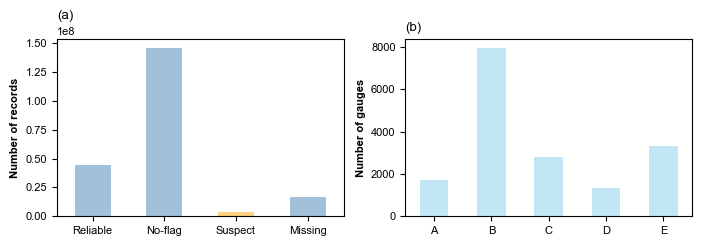

In [57]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

# Assuming you have a DataFrame called 'catchment_data' containing the classification results
# and another DataFrame called 'network_estreams' containing the count information

# Count the occurrences of each classification
classification_counts = network_estreams['gauge_flag'].value_counts()

# Define the order of classifications for plotting
classification_order = ['A', 'B', 'C', 'D', 'E']

# Sum the counts of each category
count_sum = network_estreams[["num_days_reliable", "num_days_noflag", "num_days_suspect", "num_days_gaps"]].sum()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))


# Plot the sum of measurement counts in subplot 2
count_sum.plot(kind='bar', color=['steelblue', 'steelblue', 'orange', 'steelblue'], ax=axes[0], alpha=0.5)
axes[0].set_title('(a)', loc="left")
#axes[0].set_xlabel('Quality flag (records)')
axes[0].set_ylabel('Number of records')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xticklabels(['Reliable', 'No-flag', 'Suspect', 'Missing'])

# Plot the classification counts in subplot 1
classification_counts.loc[classification_order].plot(kind='bar', color='skyblue', ax=axes[1], alpha=0.5)
axes[1].set_title('(b)', loc="left")
#axes[1].set_xlabel('Quality flag (gauge)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of gauges')
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()

fig.savefig('results/figure_quality.png', dpi=300,  bbox_inches='tight')

# Show the plot
plt.show()


## End